In [1970]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn import decomposition
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from sklearn.linear_model import LinearRegression

import warnings
from sklearn.ensemble import BaggingClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import glob
pd.set_option("max_columns", None)

In [1971]:
def data_proc(loc):
    dire = glob.glob(loc[0] + "/*.csv")
    tmp = pd.read_csv(dire[0])
    df = pd.DataFrame(columns = tmp.columns)
    df['label'] = 0
    count=0
    for dir in loc:
        dir2 = glob.glob(dir + "/*.csv")
        for i in range(len(dir2)):
            tmp = pd.read_csv(dir2[i])
            #dropping first 7 seconds of the data
            tmp.drop(tmp.loc[(tmp['Time'] < tmp['Time'][0]+7)].index, axis = 0, inplace=True)
            if "Spontan" in dir2[i]:
                tmp['label'] = 1
            elif "Sync" in dir2[i]:
                tmp['label'] = 2
            df = (pd.concat([tmp, df]))
    df[" Hand Type"].replace({"left": 0, "right": 1}, inplace=True)
    return df

In [1972]:
def aln(loc):
    right = pd.read_csv(r"C:\Users\USER\Desktop\קבצים לעבודת גמר\extraFiles/HandRight.csv")
    right.drop(right.loc[(right['Time'] < right['Time'][0]+7)].index, axis = 0, inplace=True)
    right[" Hand Type"].replace({"left": 0, "right": 1}, inplace=True)
    right.reset_index(inplace= True, drop = True)
    right.drop(["Time"," Frame ID"], axis=1, inplace=True)
    dire = glob.glob(loc[0] + "/*.csv")
    tmp = pd.read_csv(dire[0])
    df=[]
    for dir in loc:
        dir2 = glob.glob(dir + "/*.csv")
        for i in range(len(dir2)):
            if "Alone" in dir2[i]:
                tmp['label'] = 0  
                tmp = pd.read_csv(dir2[i])
                #dropping first 7 seconds of the data
                tmp.drop(tmp.loc[(tmp['Time'] < tmp['Time'][0]+7)].index, axis = 0, inplace=True)
                tmp[" Hand Type"].replace({"left": 0, "right": 1}, inplace=True)
                tmp.drop(tmp.loc[(tmp[' Hand Type'] == 1)].index, axis = 0, inplace=True)
                tmp['label'] = 0
                tmp.reset_index(inplace= True, drop = True)
                tmp = pd.concat([tmp, right], axis=1, join='inner')
        df.append(tmp)
    new = df[0]
    for i in range(len(df)-1):
        new = pd.concat([new, df[i+1]])
    return new.dropna()

Reading the data and combinning left and right hands

In [1973]:
dire = glob.glob(r'C:\Users\USER\Desktop\Training/*')
not_aln = data_proc(dire)

#deleting the data with one hand
left = not_aln.loc[not_aln[' Hand Type'] == 0 ]
right = not_aln.loc[not_aln[' Hand Type'] == 1]
not_aln = pd.merge(left, right, on=[' Frame ID'], how='inner')
not_aln = not_aln.dropna()
not_aln.head()

,Time_x,Frame ID,Hand Type_x,# hands_x,Position X_x,Position Y_x,Position Z_x,Velocity X_x,Velocity Y_x,Velocity Z_x,Pitch_x,Roll_x,Yaw_x,Wrist Pos X_x,Wrist Pos Y_x,Wrist Pos Z_x,Elbow pos X_x,Elbow Pos Y_x,Elbow Pos Z_x,Grab Strenth_x,Grab Angle_x,Pinch Strength_x,label_x,Time_y,Hand Type_y,# hands_y,Position X_y,Position Y_y,Position Z_y,Velocity X_y,Velocity Y_y,Velocity Z_y,Pitch_y,Roll_y,Yaw_y,Wrist Pos X_y,Wrist Pos Y_y,Wrist Pos Z_y,Elbow pos X_y,Elbow Pos Y_y,Elbow Pos Z_y,Grab Strenth_y,Grab Angle_y,Pinch Strength_y,label_y
0,788.4187,61729,0,2,-138.1052,249.0437,21.30924,-11.36070,-26.2601,-12.07120,1.468756,1.241289,1.301222,-168.4162,180.89610,19.90572,-317.1709,-37.17384,39.49545,0.0,0.843670,0.0,2.0,788.4187,1,2,70.78098,279.7763,53.523280,-37.70878,28.76184,-98.75040,1.276016,-1.257359,-0.842252,101.8301,212.79410,64.75998,272.9008,12.31499,89.44131,0.0,0.000000,0.0,2.0
1,788.4187,61729,0,2,-138.1052,249.0437,21.30924,-11.36070,-26.2601,-12.07120,1.468756,1.241289,1.301222,-168.4162,180.89610,19.90572,-317.1709,-37.17384,39.49545,0.0,0.843670,0.0,2.0,513.3118,1,2,108.88290,201.9868,18.235060,33.85590,110.92060,156.39920,1.041631,-1.141782,-0.713062,144.9748,145.83170,41.90334,324.1416,-20.88458,97.24229,0.0,0.309685,0.0,2.0
2,788.4187,61729,0,2,-138.1052,249.0437,21.30924,-11.36070,-26.2601,-12.07120,1.468756,1.241289,1.301222,-168.4162,180.89610,19.90572,-317.1709,-37.17384,39.49545,0.0,0.843670,0.0,2.0,530.9562,1,2,167.95250,115.5416,6.978595,75.27000,-233.12380,15.50476,0.944468,-0.403335,-1.195863,224.6199,85.80244,26.81517,314.2828,-90.18880,167.06650,0.0,0.828545,0.0,2.0
3,788.4187,61729,0,2,-138.1052,249.0437,21.30924,-11.36070,-26.2601,-12.07120,1.468756,1.241289,1.301222,-168.4162,180.89610,19.90572,-317.1709,-37.17384,39.49545,0.0,0.843670,0.0,2.0,534.9290,1,2,174.41670,219.2216,58.982900,-125.21860,-254.07690,-210.97310,0.630314,-0.461164,-0.364442,209.4502,179.58240,109.99620,407.5642,35.60456,200.35180,0.0,0.765023,0.0,1.0
4,513.3118,61729,0,2,-102.4619,143.2690,23.95443,-26.22757,96.3688,29.58566,1.095066,1.456620,0.717346,-131.7719,82.23888,44.37988,-290.2765,-105.56970,94.99306,0.0,0.056228,0.0,2.0,788.4187,1,2,70.78098,279.7763,53.523280,-37.70878,28.76184,-98.75040,1.276016,-1.257359,-0.842252,101.8301,212.79410,64.75998,272.9008,12.31499,89.44131,0.0,0.000000,0.0,2.0


In [1974]:
not_aln.drop(["Time_y","label_y"], axis=1, inplace=True)

In [1975]:
alone = aln(dire)
alone.head()

,Time,Frame ID,Hand Type,# hands,Position X,Position Y,Position Z,Velocity X,Velocity Y,Velocity Z,Pitch,Roll,Yaw,Wrist Pos X,Wrist Pos Y,Wrist Pos Z,Elbow pos X,Elbow Pos Y,Elbow Pos Z,Grab Strenth,Grab Angle,Pinch Strength,label,Hand Type,# hands,Position X,Position Y,Position Z,Velocity X,Velocity Y,Velocity Z,Pitch,Roll,Yaw,Wrist Pos X,Wrist Pos Y,Wrist Pos Z,Elbow pos X,Elbow Pos Y,Elbow Pos Z,Grab Strenth,Grab Angle,Pinch Strength
0,525.8185,150428,0,1,-52.96039,184.5535,-2.856696,162.15270,127.60520,-85.83782,1.238877,1.021919,1.199751,-101.04550,132.5940,4.449887,-307.7127,-12.177800,5.125422,0.0,0.073635,0.0,0,1,1,11.93032,199.9861,4.981665,-35.512210,-165.3466,-57.68153,-0.092033,0.108262,-0.906612,75.45740,206.0521,45.38764,284.3946,140.0167,201.9318,0.0,0.561324,0.0
1,525.8351,150430,0,1,-50.04434,185.5024,-4.845364,102.82480,-24.84337,-79.46504,1.244299,1.132981,1.171960,-95.51471,131.5824,2.853924,-313.0367,3.746006,-0.704697,0.0,0.018766,0.0,0,1,1,11.19190,195.3075,3.661716,-43.587440,-309.8374,-77.18515,-0.111674,0.126925,-0.904311,74.46141,202.4562,44.28679,282.6278,140.9712,203.6773,0.0,0.626321,0.0
2,525.8516,150432,0,1,-49.07749,182.2930,-6.442950,12.12360,-258.75260,-99.40902,1.220772,1.250050,1.152816,-94.32024,128.7403,2.742160,-322.1467,20.402740,-2.617105,0.0,0.018409,0.0,0,1,1,10.53308,189.0297,2.829388,-30.403600,-363.0033,-43.79815,-0.140004,0.127218,-0.901862,73.60060,197.4387,43.54082,280.6384,142.5401,206.7526,0.0,0.636596,0.0
3,525.8682,150434,0,1,-50.89614,176.7708,-9.005262,-53.57292,-271.01500,-143.03330,1.096965,1.535388,1.114818,-99.72611,127.6519,5.047988,-331.5826,28.883190,-7.521224,0.0,0.149852,0.0,0,1,1,10.24300,181.9816,2.064330,-15.424000,-423.2120,-43.99948,-0.166623,0.122782,-0.901268,73.19537,191.7202,42.73155,279.7357,148.1382,209.9330,0.0,0.701644,0.0
4,525.8848,150436,0,1,-51.76074,174.1853,-10.600340,-40.95883,-140.44390,-59.85620,1.004597,1.760037,1.091361,-102.66840,128.2257,6.734126,-333.9562,27.848030,-3.312394,0.0,0.242324,0.0,0,1,1,10.02061,174.8592,1.228467,-8.733602,-413.4513,-53.88054,-0.197763,0.127587,-0.897777,72.68671,186.1613,41.98006,278.6890,152.5215,212.1112,0.0,0.786548,0.0


Renaming dupilcated columns for contact not_aln


In [1976]:
cols=pd.Series(alone.columns)
for dup in cols[cols.duplicated()].unique(): 
    cols[cols[cols == dup].index.values.tolist()] = [dup + '.' + str(i) if i != 0 else dup for i in range(sum(cols == dup))]
alone.columns=cols

In [1977]:
for i in range(len(not_aln.columns)):
    alone = alone.rename(columns={alone.columns[i]:not_aln.columns[i]})

In [1978]:
train_df = pd.concat([alone,not_aln], ignore_index=True,axis=0)
train_df.head()

,Time_x,Frame ID,Hand Type_x,# hands_x,Position X_x,Position Y_x,Position Z_x,Velocity X_x,Velocity Y_x,Velocity Z_x,Pitch_x,Roll_x,Yaw_x,Wrist Pos X_x,Wrist Pos Y_x,Wrist Pos Z_x,Elbow pos X_x,Elbow Pos Y_x,Elbow Pos Z_x,Grab Strenth_x,Grab Angle_x,Pinch Strength_x,label_x,Hand Type_y,# hands_y,Position X_y,Position Y_y,Position Z_y,Velocity X_y,Velocity Y_y,Velocity Z_y,Pitch_y,Roll_y,Yaw_y,Wrist Pos X_y,Wrist Pos Y_y,Wrist Pos Z_y,Elbow pos X_y,Elbow Pos Y_y,Elbow Pos Z_y,Grab Strenth_y,Grab Angle_y,Pinch Strength_y
0,525.8185,150428,0,1,-52.96039,184.5535,-2.856696,162.15270,127.60520,-85.83782,1.238877,1.021919,1.199751,-101.04550,132.5940,4.449887,-307.7127,-12.177800,5.125422,0.0,0.073635,0.0,0.0,1,1,11.93032,199.9861,4.981665,-35.512210,-165.3466,-57.68153,-0.092033,0.108262,-0.906612,75.45740,206.0521,45.38764,284.3946,140.0167,201.9318,0.0,0.561324,0.0
1,525.8351,150430,0,1,-50.04434,185.5024,-4.845364,102.82480,-24.84337,-79.46504,1.244299,1.132981,1.171960,-95.51471,131.5824,2.853924,-313.0367,3.746006,-0.704697,0.0,0.018766,0.0,0.0,1,1,11.19190,195.3075,3.661716,-43.587440,-309.8374,-77.18515,-0.111674,0.126925,-0.904311,74.46141,202.4562,44.28679,282.6278,140.9712,203.6773,0.0,0.626321,0.0
2,525.8516,150432,0,1,-49.07749,182.2930,-6.442950,12.12360,-258.75260,-99.40902,1.220772,1.250050,1.152816,-94.32024,128.7403,2.742160,-322.1467,20.402740,-2.617105,0.0,0.018409,0.0,0.0,1,1,10.53308,189.0297,2.829388,-30.403600,-363.0033,-43.79815,-0.140004,0.127218,-0.901862,73.60060,197.4387,43.54082,280.6384,142.5401,206.7526,0.0,0.636596,0.0
3,525.8682,150434,0,1,-50.89614,176.7708,-9.005262,-53.57292,-271.01500,-143.03330,1.096965,1.535388,1.114818,-99.72611,127.6519,5.047988,-331.5826,28.883190,-7.521224,0.0,0.149852,0.0,0.0,1,1,10.24300,181.9816,2.064330,-15.424000,-423.2120,-43.99948,-0.166623,0.122782,-0.901268,73.19537,191.7202,42.73155,279.7357,148.1382,209.9330,0.0,0.701644,0.0
4,525.8848,150436,0,1,-51.76074,174.1853,-10.600340,-40.95883,-140.44390,-59.85620,1.004597,1.760037,1.091361,-102.66840,128.2257,6.734126,-333.9562,27.848030,-3.312394,0.0,0.242324,0.0,0.0,1,1,10.02061,174.8592,1.228467,-8.733602,-413.4513,-53.88054,-0.197763,0.127587,-0.897777,72.68671,186.1613,41.98006,278.6890,152.5215,212.1112,0.0,0.786548,0.0


In [1979]:
train_df.reset_index(inplace= True, drop = True)
train_df

,Time_x,Frame ID,Hand Type_x,# hands_x,Position X_x,Position Y_x,Position Z_x,Velocity X_x,Velocity Y_x,Velocity Z_x,Pitch_x,Roll_x,Yaw_x,Wrist Pos X_x,Wrist Pos Y_x,Wrist Pos Z_x,Elbow pos X_x,Elbow Pos Y_x,Elbow Pos Z_x,Grab Strenth_x,Grab Angle_x,Pinch Strength_x,label_x,Hand Type_y,# hands_y,Position X_y,Position Y_y,Position Z_y,Velocity X_y,Velocity Y_y,Velocity Z_y,Pitch_y,Roll_y,Yaw_y,Wrist Pos X_y,Wrist Pos Y_y,Wrist Pos Z_y,Elbow pos X_y,Elbow Pos Y_y,Elbow Pos Z_y,Grab Strenth_y,Grab Angle_y,Pinch Strength_y
0,525.8185,150428,0,1,-52.96039,184.5535,-2.856696,162.15270,127.60520,-85.83782,1.238877,1.021919,1.199751,-101.04550,132.5940,4.449887,-307.7127,-12.177800,5.125422,0.0,0.073635,0.0,0.0,1,1,11.93032,199.9861,4.981665,-35.512210,-165.3466,-57.68153,-0.092033,0.108262,-0.906612,75.45740,206.0521,45.38764,284.3946,140.01670,201.9318,0.0,0.561324,0.0
1,525.8351,150430,0,1,-50.04434,185.5024,-4.845364,102.82480,-24.84337,-79.46504,1.244299,1.132981,1.171960,-95.51471,131.5824,2.853924,-313.0367,3.746006,-0.704697,0.0,0.018766,0.0,0.0,1,1,11.19190,195.3075,3.661716,-43.587440,-309.8374,-77.18515,-0.111674,0.126925,-0.904311,74.46141,202.4562,44.28679,282.6278,140.97120,203.6773,0.0,0.626321,0.0
2,525.8516,150432,0,1,-49.07749,182.2930,-6.442950,12.12360,-258.75260,-99.40902,1.220772,1.250050,1.152816,-94.32024,128.7403,2.742160,-322.1467,20.402740,-2.617105,0.0,0.018409,0.0,0.0,1,1,10.53308,189.0297,2.829388,-30.403600,-363.0033,-43.79815,-0.140004,0.127218,-0.901862,73.60060,197.4387,43.54082,280.6384,142.54010,206.7526,0.0,0.636596,0.0
3,525.8682,150434,0,1,-50.89614,176.7708,-9.005262,-53.57292,-271.01500,-143.03330,1.096965,1.535388,1.114818,-99.72611,127.6519,5.047988,-331.5826,28.883190,-7.521224,0.0,0.149852,0.0,0.0,1,1,10.24300,181.9816,2.064330,-15.424000,-423.2120,-43.99948,-0.166623,0.122782,-0.901268,73.19537,191.7202,42.73155,279.7357,148.13820,209.9330,0.0,0.701644,0.0
4,525.8848,150436,0,1,-51.76074,174.1853,-10.600340,-40.95883,-140.44390,-59.85620,1.004597,1.760037,1.091361,-102.66840,128.2257,6.734126,-333.9562,27.848030,-3.312394,0.0,0.242324,0.0,0.0,1,1,10.02061,174.8592,1.228467,-8.733602,-413.4513,-53.88054,-0.197763,0.127587,-0.897777,72.68671,186.1613,41.98006,278.6890,152.52150,212.1112,0.0,0.786548,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150202,410.9128,137189,0,2,-95.26167,187.1566,27.775130,-100.01640,259.66260,109.08770,0.945622,0.097771,1.234838,-157.58130,162.9209,43.551780,-344.1902,3.929046,26.054930,0.0,0.360753,0.0,1.0,1,2,156.24980,276.9035,-23.157730,45.696690,-505.7859,-85.37115,0.631008,-0.670556,-0.060598,172.50640,233.2361,27.74495,298.7240,38.13409,107.8183,0.0,0.155385,0.0
150203,410.9301,137191,0,2,-96.44621,190.4206,29.697050,-48.75451,157.40360,119.88800,0.962525,0.120285,1.237597,-158.72110,165.6540,44.968040,-347.0346,9.262455,22.896510,0.0,0.433648,0.0,1.0,1,2,157.14740,269.3881,-24.731580,36.853810,-481.1920,-52.25867,0.532728,-0.697231,-0.048219,172.89990,230.2340,29.81262,297.6808,39.08725,120.9174,0.0,0.238977,0.0
150204,410.9461,137193,0,2,-97.82056,193.5205,31.933430,-85.41756,173.52750,132.65640,0.991354,0.157140,1.243927,-159.94500,167.8123,46.467390,-349.1904,13.021370,21.300050,0.0,0.539401,0.0,1.0,1,2,157.58180,261.2187,-25.078950,17.020390,-461.6251,-10.58560,0.426627,-0.714095,-0.047516,173.45170,227.2283,32.64997,298.0053,37.92620,127.8263,0.0,0.315757,0.0
150205,410.9625,137195,0,2,-99.81297,196.2407,34.418740,-117.87250,134.38010,126.73710,1.027913,0.196651,1.251931,-161.61410,169.2442,48.278710,-351.2047,14.822060,23.445880,0.0,0.666431,0.0,1.0,1,2,157.14880,252.6001,-24.638610,-57.161400,-494.4145,27.38884,0.352168,-0.693904,-0.041292,172.98460,222.5917,35.08617,300.6257,34.79204,129.1417,0.0,0.482085,0.0


Reducing the data by deleting 5 rows at a time

In [1980]:
train_df['index'] = train_df.index
train_df.drop(train_df.loc[(train_df['label_x'] == 0) & (train_df['index']%5!=0)].index , axis=0, inplace = True)
train_df.drop(train_df.loc[(train_df['label_x'] == 1) & (train_df['index']%5!=0)].index , axis=0, inplace = True)
train_df.drop(train_df.loc[(train_df['label_x'] == 2) & (train_df['index']%5!=0)].index , axis=0, inplace = True)

Data distribution


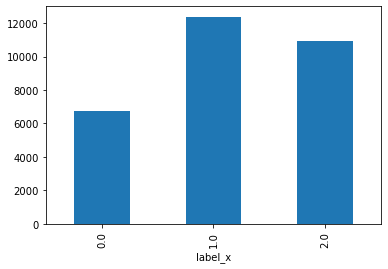

In [1981]:
lables = train_df.groupby('label_x')[' Frame ID'].count()
lables.plot.bar()
print("Data distribution")
plt.show()

### PCA Visulazie

shape of pca_reduced.shape =  (30042, 2)


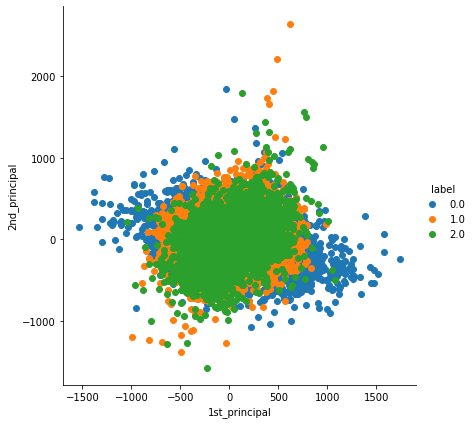

In [1982]:
pca = decomposition.PCA()
pca.n_components = 2
pca_data = pca.fit_transform(X_train)
print("shape of pca_reduced.shape = ", pca_data.shape)
pca_data = np.vstack((pca_data.T, y_train)).T
pca_df = pd.DataFrame(data=pca_data, columns=("1st_principal", "2nd_principal", "label"))
sns.FacetGrid(pca_df, hue="label", size=6).map(plt.scatter, '1st_principal', '2nd_principal').add_legend()
plt.show()

In [1983]:
X_train

,Time_x,Hand Type_x,Position X_x,Position Y_x,Position Z_x,Velocity X_x,Velocity Y_x,Velocity Z_x,Pitch_x,Roll_x,Yaw_x,Wrist Pos X_x,Wrist Pos Y_x,Wrist Pos Z_x,Elbow pos X_x,Elbow Pos Y_x,Elbow Pos Z_x,Grab Strenth_x,Grab Angle_x,Pinch Strength_x,Hand Type_y,Position X_y,Position Y_y,Position Z_y,Velocity X_y,Velocity Y_y,Velocity Z_y,Pitch_y,Roll_y,Yaw_y,Wrist Pos X_y,Wrist Pos Y_y,Wrist Pos Z_y,Elbow pos X_y,Elbow Pos Y_y,Elbow Pos Z_y,Grab Strenth_y,Grab Angle_y,Pinch Strength_y
0,525.8185,0,-52.96039,184.5535,-2.856696,162.152700,127.605200,-85.83782,1.238877,1.021919,1.199751,-101.0455,132.5940,4.449887,-307.7127,-12.177800,5.125422,0.0,0.073635,0.0,1,11.930320,199.9861,4.981665,-35.51221,-165.34660,-57.68153,-0.092033,0.108262,-0.906612,75.45740,206.0521,45.387640,284.3946,140.01670,201.93180,0.0,0.561324,0.000000
1,525.9013,0,-51.63914,174.6907,-10.941100,7.175880,121.408300,-21.64319,0.950973,1.858496,1.077245,-103.4075,130.3693,8.344149,-332.8030,25.287080,5.874335,0.0,0.384856,0.0,1,10.120270,167.8396,0.319165,10.93965,-389.70650,-63.49560,-0.222168,0.144810,-0.892533,72.37645,180.5758,41.309360,277.8844,155.16360,213.45110,0.0,0.816478,0.000000
2,525.9845,0,-46.98974,176.1991,-18.410470,56.732560,192.937000,-50.22610,0.658797,2.756046,1.252465,-110.0707,148.8687,0.419644,-326.4427,23.302160,33.387380,0.0,0.623872,0.0,1,8.989211,151.2404,-5.773999,-38.82261,40.37412,-70.76773,-0.288131,0.173926,-0.858378,69.29805,167.2354,36.851550,268.4435,145.71950,216.85000,0.0,0.738805,0.000000
3,526.0672,0,-52.21944,190.8335,-17.444330,-46.785630,-4.991557,39.31018,0.845813,3.035643,1.302704,-113.5677,158.9876,0.022976,-301.1000,-3.239135,46.764160,0.0,0.735482,0.0,1,4.078044,175.4120,-13.814020,-54.44043,416.44050,-113.42640,-0.228900,0.130690,-0.840701,64.40801,187.9056,29.860410,265.2076,141.42160,203.21730,0.0,0.529265,0.000000
4,526.1500,0,-60.69331,201.3106,-9.538795,-163.845400,223.506700,152.66020,1.087166,-3.077740,1.343076,-119.6527,163.9966,5.086641,-318.7688,17.719580,56.336000,0.0,0.894335,0.0,1,-1.813628,220.6418,-20.973990,-63.17223,542.78220,-64.70620,-0.024196,0.025103,-0.828379,58.53020,222.3768,24.242990,244.1386,129.46610,195.89350,0.0,0.236276,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30037,410.6313,0,-87.82265,132.3093,24.430080,32.514340,94.315620,-61.79854,1.199757,0.274721,1.369496,-150.9700,105.9689,33.151220,-343.6187,-46.405380,24.433870,0.0,1.080521,0.0,1,156.339900,307.8112,-12.516720,-26.81549,398.35350,12.45263,1.193829,-1.050239,-0.641192,183.57570,247.3655,8.092607,293.0575,40.37672,82.77072,0.0,1.349257,0.769575
30038,410.7141,0,-89.80100,147.0471,17.770770,-65.887700,256.165300,-34.35579,1.110779,0.177066,1.297142,-150.2008,117.5443,30.652210,-301.5992,-75.549420,16.483750,0.0,0.610191,0.0,1,153.316300,328.2817,-9.861584,-36.29734,129.87780,19.95686,1.299078,-1.085443,-0.800466,181.20020,266.4695,5.050214,300.3917,60.43440,66.29043,0.0,1.316022,0.709807
30039,410.7969,0,-89.83100,163.2316,19.440710,-1.102904,172.245800,50.53017,0.997620,0.176021,1.259721,-150.9618,136.2571,33.385210,-297.1169,-60.684170,17.252030,0.0,0.257551,0.0,1,154.654900,323.8033,-10.017040,41.24991,-56.20380,-90.24657,1.218162,-0.957142,-0.640894,182.07760,263.2514,10.118350,306.5389,57.80570,62.16505,0.0,1.085504,0.862299
30040,410.8797,0,-91.61288,178.2845,24.172330,-26.266280,152.767300,78.01811,0.940927,0.101850,1.229043,-153.2815,153.1694,40.454040,-325.3688,-21.989580,29.836650,0.0,0.323446,0.0,1,155.174200,294.4965,-20.095240,30.07539,-400.62900,-166.15550,0.811883,-0.728772,-0.130759,174.40950,243.5695,22.565030,315.0602,52.58843,86.99381,0.0,0.178633,0.000000


data disrbution in 3d space


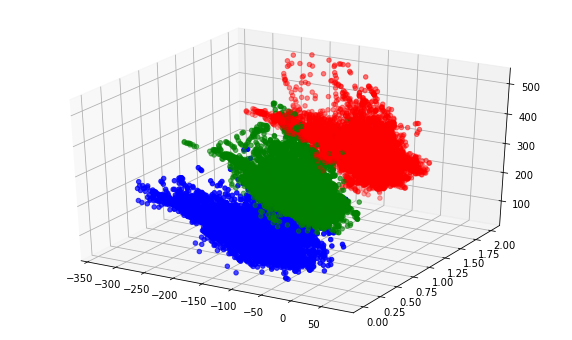

In [2016]:
fig = plt.figure(figsize = (10, 6))
ax = plt.axes(projection='3d')
my_cmap = plt.get_cmap('hsv')
zdata = X_train[' Position Y_x']
xdata = X_train[' Position X_x']
ydata = y_train
clr=[]
for y in y_train:
    if y == 0:
       clr.append('blue')
    elif y==1 :
        clr.append('green')
    elif y==2:
        clr.append('red')
ax.scatter3D(xdata, ydata, zdata, c=clr);
print("data disrbution in 3d space")

In [1985]:
dire = glob.glob(r'C:\Users\USER\Desktop\Validation/*')
not_aln = data_proc(dire)

left = not_aln.loc[not_aln[' Hand Type'] == 0 ]
right = not_aln.loc[not_aln[' Hand Type'] == 1]
not_aln = pd.merge(left, right, on=[' Frame ID'], how='inner')
not_aln = not_aln.dropna()
not_aln.head()
not_aln.drop(["Time_y","label_y"], axis=1, inplace=True)
alone = aln(dire)
cols=pd.Series(alone.columns)
for dup in cols[cols.duplicated()].unique(): 
    cols[cols[cols == dup].index.values.tolist()] = [dup + '.' + str(i) if i != 0 else dup for i in range(sum(cols == dup))]
alone.columns=cols
for i in range(len(not_aln.columns)):
    alone = alone.rename(columns={alone.columns[i]:not_aln.columns[i]})
test_df = pd.concat([alone,not_aln], ignore_index=True,axis=0)

In [1986]:
test_df['index'] = test_df.index
test_df.drop(test_df.loc[(test_df['label_x'] == 0) & (test_df['index']%5!=0)].index , axis=0, inplace = True)
test_df.drop(test_df.loc[(test_df['label_x'] == 1) & (test_df['index']%5!=0)].index , axis=0, inplace = True)
test_df.drop(test_df.loc[(test_df['label_x'] == 2) & (test_df['index']%5!=0)].index , axis=0, inplace = True)

In [1987]:
test_df

,Time_x,Frame ID,Hand Type_x,# hands_x,Position X_x,Position Y_x,Position Z_x,Velocity X_x,Velocity Y_x,Velocity Z_x,Pitch_x,Roll_x,Yaw_x,Wrist Pos X_x,Wrist Pos Y_x,Wrist Pos Z_x,Elbow pos X_x,Elbow Pos Y_x,Elbow Pos Z_x,Grab Strenth_x,Grab Angle_x,Pinch Strength_x,label_x,Hand Type_y,# hands_y,Position X_y,Position Y_y,Position Z_y,Velocity X_y,Velocity Y_y,Velocity Z_y,Pitch_y,Roll_y,Yaw_y,Wrist Pos X_y,Wrist Pos Y_y,Wrist Pos Z_y,Elbow pos X_y,Elbow Pos Y_y,Elbow Pos Z_y,Grab Strenth_y,Grab Angle_y,Pinch Strength_y,index
0,962.0724,112175,0,1,-139.56040,289.5980,55.82040,85.41927,-314.15190,-17.789130,1.073130,0.468331,1.327694,-200.4914,261.7830,63.46514,-379.1310,110.43980,116.0856,0.000000,0.911471,0.000000,0.0,1,1,11.930320,199.9861,4.981665,-35.51221,-165.346600,-57.68153,-0.092033,0.108262,-0.906612,75.45740,206.0521,45.38764,284.3946,140.01670,201.9318,0.0,0.561324,0.0,0
5,962.1551,112185,0,1,-125.52710,258.4183,53.24498,166.57770,-254.01480,-28.931970,0.985712,0.375179,1.344015,-188.5147,235.6829,60.26236,-370.7249,86.82882,107.6254,0.074778,1.100305,0.000000,0.0,1,1,10.120270,167.8396,0.319165,10.93965,-389.706500,-63.49560,-0.222168,0.144810,-0.892533,72.37645,180.5758,41.30936,277.8844,155.16360,213.4511,0.0,0.816478,0.0,5
10,962.2380,112194,0,1,-108.67510,229.7051,52.61536,259.28200,-384.51190,-7.424198,0.598001,0.196425,1.362299,-174.6450,218.4483,59.20366,-375.0312,96.89922,110.9002,0.000000,0.952129,0.000000,0.0,1,1,8.989211,151.2404,-5.773999,-38.82261,40.374120,-70.76773,-0.288131,0.173926,-0.858378,69.29805,167.2354,36.85155,268.4435,145.71950,216.8500,0.0,0.738805,0.0,10
15,962.3211,112204,0,1,-82.61842,191.9577,49.08280,324.52890,-362.01080,-65.391750,-0.067279,0.032739,1.373091,-149.4079,192.1420,56.38552,-364.6372,123.57460,137.4794,0.000000,0.951137,0.000000,0.0,1,1,4.078044,175.4120,-13.814020,-54.44043,416.440500,-113.42640,-0.228900,0.130690,-0.840701,64.40801,187.9056,29.86041,265.2076,141.42160,203.2173,0.0,0.529265,0.0,15
20,962.4043,112213,0,1,-57.53506,165.8517,42.94850,316.68620,-303.84820,-89.317490,-0.182486,-0.003008,1.357690,-124.1464,169.2376,51.65498,-342.8061,131.07780,142.9411,0.000000,0.851259,0.000000,0.0,1,1,-1.813628,220.6418,-20.973990,-63.17223,542.782200,-64.70620,-0.024196,0.025103,-0.828379,58.53020,222.3768,24.24299,244.1386,129.46610,195.8935,0.0,0.236276,0.0,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30170,846.8630,98909,0,2,-157.09930,258.1204,128.70130,112.37380,-61.19361,54.574810,1.255643,0.822582,1.293431,-208.9106,214.5980,134.13700,-403.1607,74.78490,157.7943,0.995937,2.488834,1.000000,1.0,1,2,121.361100,238.3447,44.613770,146.46890,-197.785800,-258.17690,0.861678,-0.920447,-0.664376,160.04360,191.9166,75.70644,321.5389,26.45741,141.9104,0.0,0.131260,0.0,30170
30175,846.9468,98918,0,2,-143.40670,250.7713,130.37870,210.39310,-90.73238,27.505620,1.317480,0.766299,1.350982,-196.0478,208.2301,134.15800,-385.2085,65.86041,176.4612,0.520807,1.770067,0.988800,1.0,1,2,125.816800,227.0900,29.574420,-11.89945,-131.953600,-137.32840,0.621430,-0.903986,-0.580289,165.18610,189.2924,70.03735,321.1396,33.09612,165.5448,0.0,0.260625,0.0,30175
30180,847.0287,98927,0,2,-133.96010,242.6735,130.30610,58.64370,-93.16484,-15.014350,1.221199,0.723997,1.300457,-188.7715,203.2793,137.00310,-382.6132,67.83439,180.8273,0.000000,0.967849,0.244107,1.0,1,2,122.708800,222.5783,27.190060,-76.89113,3.778484,65.50002,0.563864,-0.840770,-0.623272,165.10110,188.5277,67.89595,326.2983,38.50824,164.5918,0.0,0.187589,0.0,30180
30185,847.1115,98937,0,2,-134.80330,240.7694,127.39810,-43.50486,68.14906,-71.390680,1.142423,0.724302,1.250897,-189.6739,201.7962,136.25370,-374.0904,51.11701,169.8214,0.000000,0.514725,0.000000,1.0,1,2,113.587100,229.2556,36.585120,-83.21931,154.580400,190.63690,0.768140,-0.841652,-0.722486,157.54240,189.7334,70.11401,340.6904,65.93967,164.8

In [1988]:
train_df

,Time_x,Frame ID,Hand Type_x,# hands_x,Position X_x,Position Y_x,Position Z_x,Velocity X_x,Velocity Y_x,Velocity Z_x,Pitch_x,Roll_x,Yaw_x,Wrist Pos X_x,Wrist Pos Y_x,Wrist Pos Z_x,Elbow pos X_x,Elbow Pos Y_x,Elbow Pos Z_x,Grab Strenth_x,Grab Angle_x,Pinch Strength_x,label_x,Hand Type_y,# hands_y,Position X_y,Position Y_y,Position Z_y,Velocity X_y,Velocity Y_y,Velocity Z_y,Pitch_y,Roll_y,Yaw_y,Wrist Pos X_y,Wrist Pos Y_y,Wrist Pos Z_y,Elbow pos X_y,Elbow Pos Y_y,Elbow Pos Z_y,Grab Strenth_y,Grab Angle_y,Pinch Strength_y,index
0,525.8185,150428,0,1,-52.96039,184.5535,-2.856696,162.152700,127.605200,-85.83782,1.238877,1.021919,1.199751,-101.0455,132.5940,4.449887,-307.7127,-12.177800,5.125422,0.0,0.073635,0.0,0.0,1,1,11.930320,199.9861,4.981665,-35.51221,-165.34660,-57.68153,-0.092033,0.108262,-0.906612,75.45740,206.0521,45.387640,284.3946,140.01670,201.93180,0.0,0.561324,0.000000,0
5,525.9013,150438,0,1,-51.63914,174.6907,-10.941100,7.175880,121.408300,-21.64319,0.950973,1.858496,1.077245,-103.4075,130.3693,8.344149,-332.8030,25.287080,5.874335,0.0,0.384856,0.0,0.0,1,1,10.120270,167.8396,0.319165,10.93965,-389.70650,-63.49560,-0.222168,0.144810,-0.892533,72.37645,180.5758,41.309360,277.8844,155.16360,213.45110,0.0,0.816478,0.000000,5
10,525.9845,150447,0,1,-46.98974,176.1991,-18.410470,56.732560,192.937000,-50.22610,0.658797,2.756046,1.252465,-110.0707,148.8687,0.419644,-326.4427,23.302160,33.387380,0.0,0.623872,0.0,0.0,1,1,8.989211,151.2404,-5.773999,-38.82261,40.37412,-70.76773,-0.288131,0.173926,-0.858378,69.29805,167.2354,36.851550,268.4435,145.71950,216.85000,0.0,0.738805,0.000000,10
15,526.0672,150457,0,1,-52.21944,190.8335,-17.444330,-46.785630,-4.991557,39.31018,0.845813,3.035643,1.302704,-113.5677,158.9876,0.022976,-301.1000,-3.239135,46.764160,0.0,0.735482,0.0,0.0,1,1,4.078044,175.4120,-13.814020,-54.44043,416.44050,-113.42640,-0.228900,0.130690,-0.840701,64.40801,187.9056,29.860410,265.2076,141.42160,203.21730,0.0,0.529265,0.000000,15
20,526.1500,150466,0,1,-60.69331,201.3106,-9.538795,-163.845400,223.506700,152.66020,1.087166,-3.077740,1.343076,-119.6527,163.9966,5.086641,-318.7688,17.719580,56.336000,0.0,0.894335,0.0,0.0,1,1,-1.813628,220.6418,-20.973990,-63.17223,542.78220,-64.70620,-0.024196,0.025103,-0.828379,58.53020,222.3768,24.242990,244.1386,129.46610,195.89350,0.0,0.236276,0.000000,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150185,410.6313,137157,0,2,-87.82265,132.3093,24.430080,32.514340,94.315620,-61.79854,1.199757,0.274721,1.369496,-150.9700,105.9689,33.151220,-343.6187,-46.405380,24.433870,0.0,1.080521,0.0,1.0,1,2,156.339900,307.8112,-12.516720,-26.81549,398.35350,12.45263,1.193829,-1.050239,-0.641192,183.57570,247.3655,8.092607,293.0575,40.37672,82.77072,0.0,1.349257,0.769575,150185
150190,410.7141,137166,0,2,-89.80100,147.0471,17.770770,-65.887700,256.165300,-34.35579,1.110779,0.177066,1.297142,-150.2008,117.5443,30.652210,-301.5992,-75.549420,16.483750,0.0,0.610191,0.0,1.0,1,2,153.316300,328.2817,-9.861584,-36.29734,129.87780,19.95686,1.299078,-1.085443,-0.800466,181.20020,266.4695,5.050214,300.3917,60.43440,66.29043,0.0,1.316022,0.709807,150190
150195,410.7969,137176,0,2,-89.83100,163.2316,19.440710,-1.102904,172.245800,50.53017,0.997620,0.176021,1.259721,-150.9618,136.2571,33.385210,-297.1169,-60.684170,17.252030,0.0,0.257551,0.0,1.0,1,2,154.654900,323.8033,-10.017040,41.24991,-56.20380,-90.24657,1.218162,-0.957142,-0.640894,182.07760,263.2514,10.118350,306.5389,57.80570,62.16505,0.0,1.085504,0.862299,150195
150200,410.8797,137185,0,2,-91.61288,178.2845,24.172330,-26.266280,152.767300,78.01811,0.940927,0.101850,1.229043,-153.2815,153.1694,40.454040,-325.3688,-21.989580,29.836650,0.0,0.323446,0.0,1.0,1,2,155.174200,294.4965,-20.095240,30.07539,-400.62900,-166.15550,0.811883,-0.728772,-0.130759,174.40950,243.5695,22.565030,315.0602,52.58843,86.99381,0.0,0.178633,0

In [1989]:
train_df.drop([' # hands_x',' Frame ID',' # hands_y'], axis=1, inplace = True)
test_df.drop([' # hands_x',' Frame ID',' # hands_y'], axis=1, inplace = True)

In [1990]:
train_df.head()

,Time_x,Hand Type_x,Position X_x,Position Y_x,Position Z_x,Velocity X_x,Velocity Y_x,Velocity Z_x,Pitch_x,Roll_x,Yaw_x,Wrist Pos X_x,Wrist Pos Y_x,Wrist Pos Z_x,Elbow pos X_x,Elbow Pos Y_x,Elbow Pos Z_x,Grab Strenth_x,Grab Angle_x,Pinch Strength_x,label_x,Hand Type_y,Position X_y,Position Y_y,Position Z_y,Velocity X_y,Velocity Y_y,Velocity Z_y,Pitch_y,Roll_y,Yaw_y,Wrist Pos X_y,Wrist Pos Y_y,Wrist Pos Z_y,Elbow pos X_y,Elbow Pos Y_y,Elbow Pos Z_y,Grab Strenth_y,Grab Angle_y,Pinch Strength_y,index
0,525.8185,0,-52.96039,184.5535,-2.856696,162.15270,127.605200,-85.83782,1.238877,1.021919,1.199751,-101.0455,132.5940,4.449887,-307.7127,-12.177800,5.125422,0.0,0.073635,0.0,0.0,1,11.930320,199.9861,4.981665,-35.51221,-165.34660,-57.68153,-0.092033,0.108262,-0.906612,75.45740,206.0521,45.38764,284.3946,140.0167,201.9318,0.0,0.561324,0.0,0
5,525.9013,0,-51.63914,174.6907,-10.941100,7.17588,121.408300,-21.64319,0.950973,1.858496,1.077245,-103.4075,130.3693,8.344149,-332.8030,25.287080,5.874335,0.0,0.384856,0.0,0.0,1,10.120270,167.8396,0.319165,10.93965,-389.70650,-63.49560,-0.222168,0.144810,-0.892533,72.37645,180.5758,41.30936,277.8844,155.1636,213.4511,0.0,0.816478,0.0,5
10,525.9845,0,-46.98974,176.1991,-18.410470,56.73256,192.937000,-50.22610,0.658797,2.756046,1.252465,-110.0707,148.8687,0.419644,-326.4427,23.302160,33.387380,0.0,0.623872,0.0,0.0,1,8.989211,151.2404,-5.773999,-38.82261,40.37412,-70.76773,-0.288131,0.173926,-0.858378,69.29805,167.2354,36.85155,268.4435,145.7195,216.8500,0.0,0.738805,0.0,10
15,526.0672,0,-52.21944,190.8335,-17.444330,-46.78563,-4.991557,39.31018,0.845813,3.035643,1.302704,-113.5677,158.9876,0.022976,-301.1000,-3.239135,46.764160,0.0,0.735482,0.0,0.0,1,4.078044,175.4120,-13.814020,-54.44043,416.44050,-113.42640,-0.228900,0.130690,-0.840701,64.40801,187.9056,29.86041,265.2076,141.4216,203.2173,0.0,0.529265,0.0,15
20,526.1500,0,-60.69331,201.3106,-9.538795,-163.84540,223.506700,152.66020,1.087166,-3.077740,1.343076,-119.6527,163.9966,5.086641,-318.7688,17.719580,56.336000,0.0,0.894335,0.0,0.0,1,-1.813628,220.6418,-20.973990,-63.17223,542.78220,-64.70620,-0.024196,0.025103,-0.828379,58.53020,222.3768,24.24299,244.1386,129.4661,195.8935,0.0,0.236276,0.0,20


In [1991]:
y_train = train_df["label_x"]
X_train = train_df.drop("label_x",axis=1)
test_df.reset_index(inplace= True, drop = True)
y_test = test_df["label_x"]
X_test = test_df.drop("label_x",axis=1)

In [1992]:
X_train.drop(['index'],axis=1, inplace = True)

In [1993]:
X_test.drop(['index'],axis=1, inplace = True)

In [1994]:
xg = XGBClassifier( use_label_encoder=False,enable_categorical=True)
xg.fit(X_train, y_train)
y_pred = xg.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy with all the data: %.2f%%" % (accuracy * 100.0))

[23:33:19] WARNING: ..\src\learner.cc:541: 
Parameters: { enable_categorical } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[23:33:19] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy with all the data: 69.43%


In [2024]:
knn = KNeighborsClassifier(n_neighbors = 50)
knn.fit(X_train , y_train)
y_pred = knn.predict(X_test)
knn_acc = accuracy_score(y_test, y_pred)

In [2025]:
rnd = RandomForestClassifier()
knn = KNeighborsClassifier(n_neighbors = 50)
dt = DecisionTreeClassifier()
rnd.fit(X_train,y_train)
rnd_acc = accuracy_score(y_test,rnd.predict(X_test))

In [2026]:
dt.fit(X_train, y_train)
dt_acc = accuracy_score(y_test,dt.predict(X_test))

In [2027]:
ada = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1), n_estimators=50,
                             algorithm="SAMME.R", learning_rate=0.8, random_state=25)
ada.fit(X_train, y_train)
y_pred = ada.predict(X_test)
ada_acc=accuracy_score(y_test, y_pred)

In [2028]:
vot = VotingClassifier(estimators = [('rnd',rnd),('knn', knn),('xgboost',xg),('dt',dt),('ada',ada)], voting='hard')
vot.fit(X_train,y_train)
vot_acc= accuracy_score(y_test,vot.predict(X_test))

[23:57:09] WARNING: ..\src\learner.cc:541: 
Parameters: { enable_categorical } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[23:57:09] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [2032]:
data = {'module': ['random forest', 'knn', 'desicion tree','adaboost', 'voting'], 'Accuracy': [rnd_acc, knn_acc, 
                                                                                               dt_acc,ada_acc, vot_acc]}
df = pd.DataFrame(data)
df

,module,Accuracy
0,random forest,0.732406
1,knn,0.695479
2,desicion tree,0.687034
3,adaboost,0.745156
4,voting,0.723133
